In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

1) Crie função para implementar os seguintes sistemas que produzem um sinal de saída a partir de um sinal de entrada:

a) Atrasador: atrasa a entrada em duas amostras

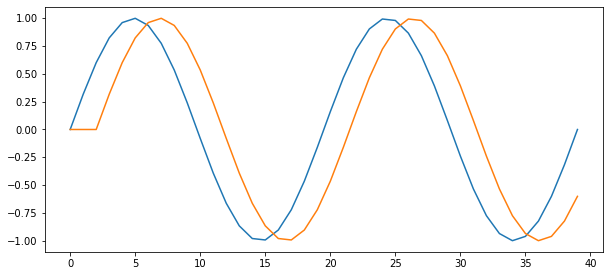

In [2]:
def atrasador(sig):
    sig1 = np.roll(sig,2)
    sig1[0] = 0
    sig1[1] = 0
    return sig1

a = np.sin(np.linspace(0, 4*np.pi, 40))
a_atrasado = atrasador(a)

plt.figure(figsize=(10,4.5))
plt.plot(a)
plt.plot(a_atrasado)


b) Média-móvel: Cada valor da saída seja a média aritmética do valor de entrada e suas 2 posições anteriores.


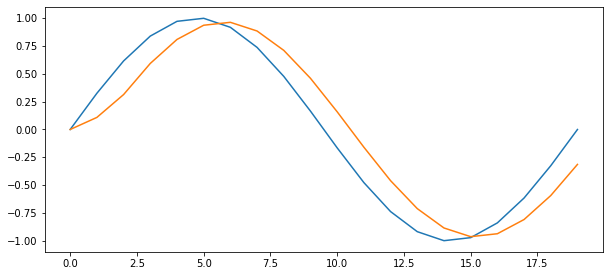

In [3]:
def media_movel(sig):
    sig1 = np.roll(sig,1)
    sig1[0] = 0
    sig2 = np.roll(sig,2)
    sig2[0] = 0
    sig2[1] = 0
    sig3 = (sig+sig1+sig2)/3
    return sig3



b = np.sin(np.linspace(0, 2*np.pi, 20))
b_mm = media_movel(b)

plt.figure(figsize=(10,4.5))
plt.plot(b)
plt.plot(b_mm)

c) Quadrador: a saída corresponde ao valor quadrático da entrada


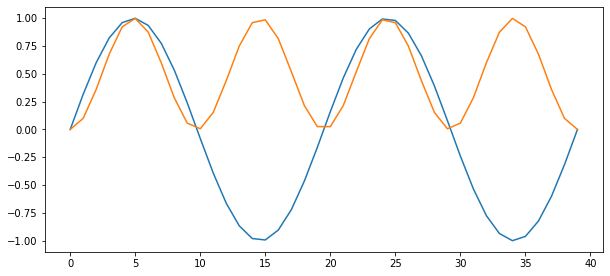

In [4]:
def quadrador(sig):
    return sig**2

c = np.sin(np.linspace(0, 4*np.pi, 40))
c_2 = quadrador(c)

plt.figure(figsize=(10,4.5))
plt.plot(c)
plt.plot(c_2)

d) Combinador: a saída corresponde a uma combinação linear da entrada multiplicada por 2 mais três vezes a entrada atrasada de 1 amostra.


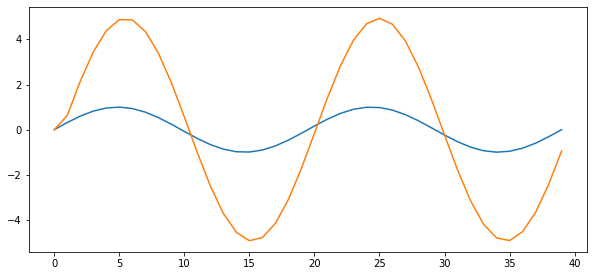

In [5]:
def combinador(sig):
    sig1 = 2*sig
    sig2 = np.roll(sig,1)
    sig2[0] = 0
    sig2 = sig2*3
    sig3 = sig1 + sig2
    return sig3

d = np.sin(np.linspace(0, 4*np.pi, 40))
d_comb = combinador(d)

plt.figure(figsize=(10,4.5))
plt.plot(d)
plt.plot(d_comb)

e) Dobrador com offset: a saída corresponde ao dobro da entrada somada ao valor 5.

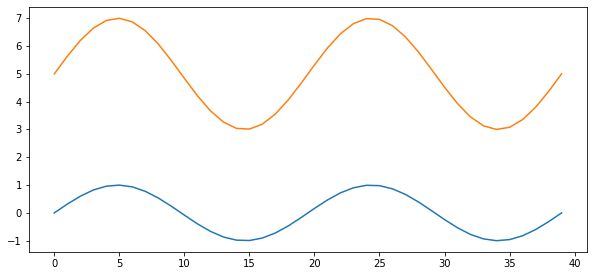

In [6]:
def dobrador(sig):
    sig1 = 2*sig
    sig1 = sig1 + 5
    return sig1

e = np.sin(np.linspace(0, 4*np.pi, 40))
e_dob = dobrador(e)

plt.figure(figsize=(10,4.5))
plt.plot(e)
plt.plot(e_dob)


f) Acumulador: A saída corresponde a acumulação (soma) dos valores do sinal de entrada até o presente momento.

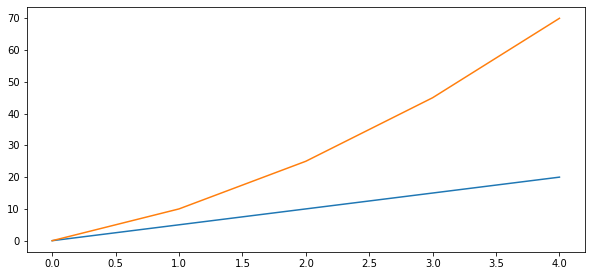

In [7]:
def acumulador(sig):
    sig0 = sig
    
    for i in range(len(sig)):
        sig1 = np.roll(sig,i)

        for j in range(i):
            sig1[j] = 0

        sig0 = sig0 + sig1

    return sig0

f = np.linspace(0, 20, 5)
f_acumulado = acumulador(f)

plt.figure(figsize=(10,4.5))
plt.plot(f)
plt.plot(f_acumulado)

2) Considere os sinais com 200 amostras:

w=4*2*pi/200

x1=sin(w*n)

x2=sign(x1)

x3=x1+x2

Crie uma função que plota no gráfico da esquerda os sinais x1,x2,x3 e no gráfico da direita os sinais y1+y2 e y3,

onde y1=T{x1}, y2=T{x2}, y3=T{x3}, e T{} é cada um dos sistemas do item anterior.


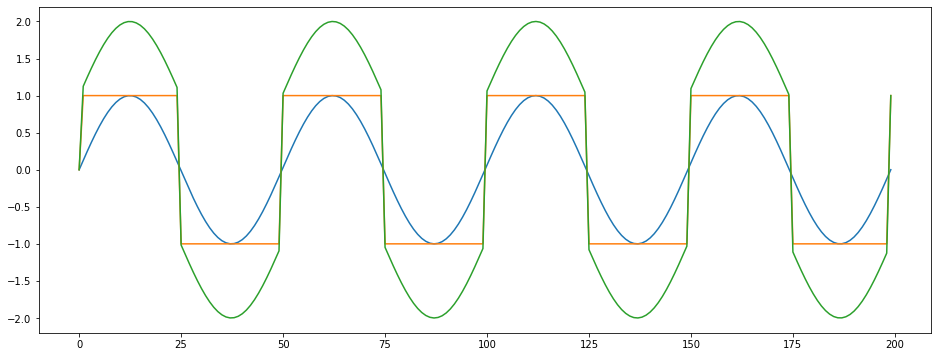

In [16]:
w = (4*2*np.pi)/200
n = np.linspace(0,200,200)
x1 = np.sin(w*n)
x2 = np.sign(x1)
x3 = x1+x2
plt.figure(figsize=(16,6))
plt.plot(x1)
plt.plot(x2)
plt.plot(x3)

In [19]:
def transformar(func, a, b, c):
    y1 = func(a)
    y2 = func(b)
    y3 = func(c)

    legenda = str(func)

    fig, axs = plt.subplots(2,figsize=(12,8))
    fig.suptitle(legenda)
    axs[0].plot(a)
    axs[0].plot(b)
    axs[0].plot(c)
    axs[1].plot(y1+y2)
    axs[1].plot(y3)

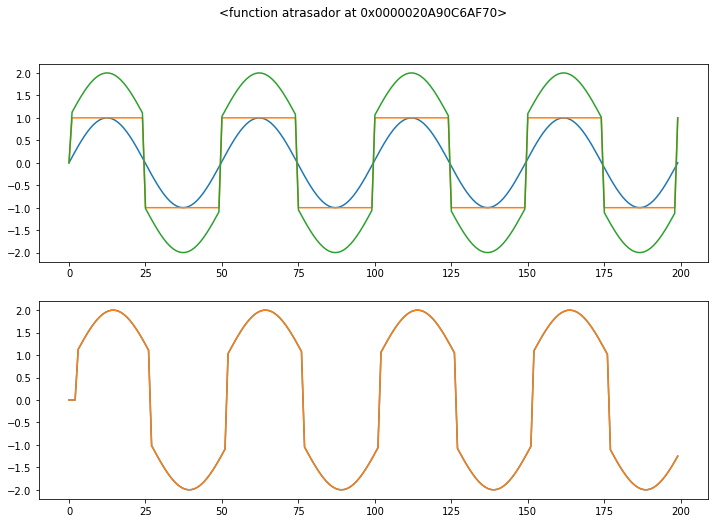

In [20]:
transformar(atrasador, x1, x2, x3)

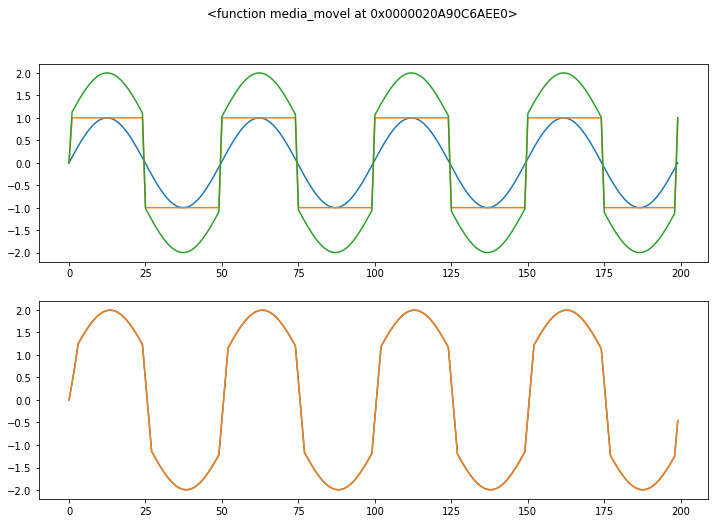

In [21]:
transformar(media_movel, x1, x2, x3)

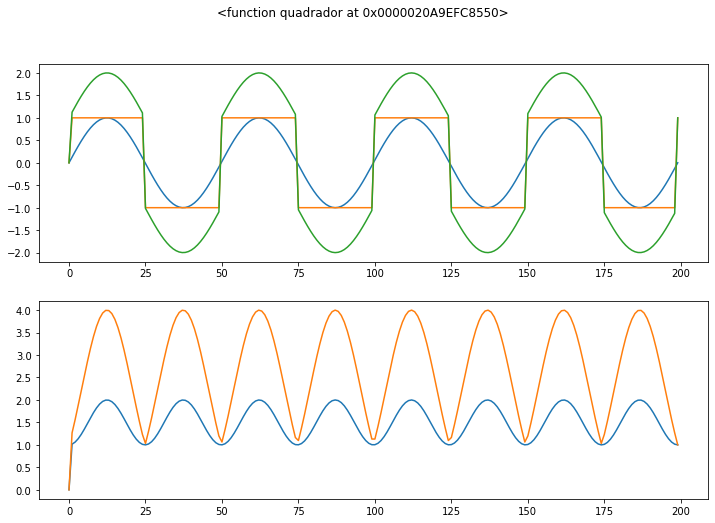

In [22]:
transformar(quadrador, x1, x2, x3)

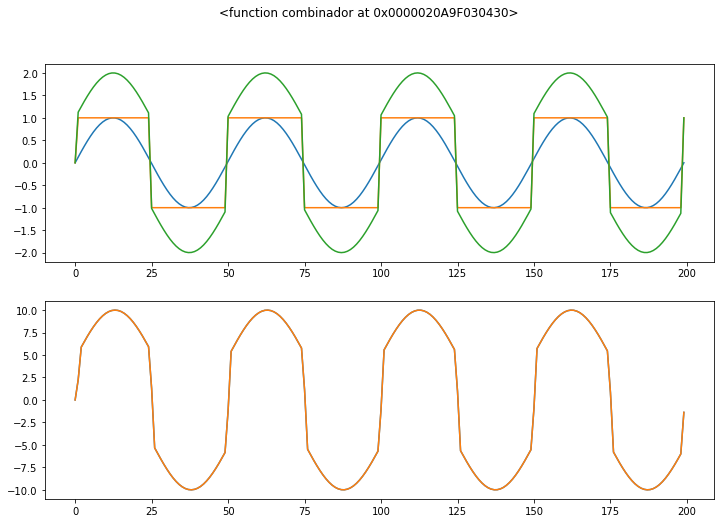

In [23]:
transformar(combinador, x1, x2, x3)

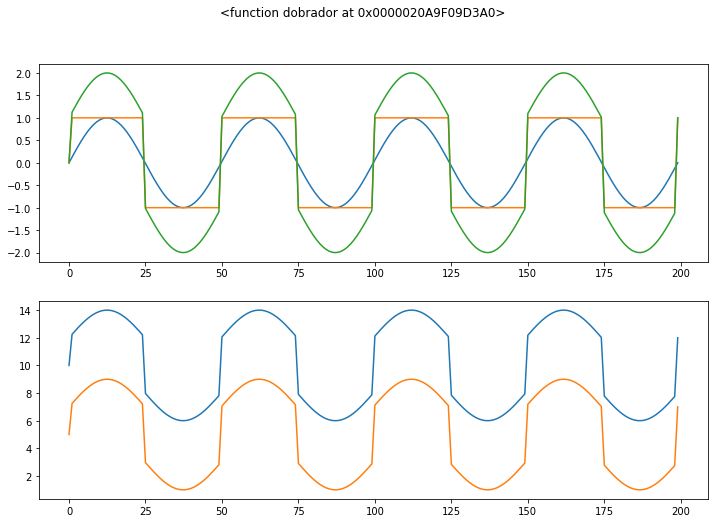

In [24]:
transformar(dobrador, x1, x2, x3)

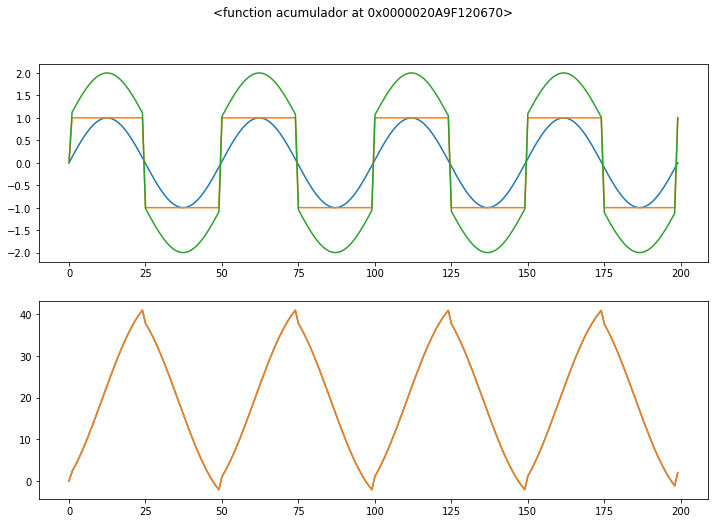

In [25]:
transformar(acumulador, x1, x2, x3)

3) Classifique os sistemas do item 1:

I) linear ou não linear

II) com memória ou sem memória

III) invariante ao deslocamento ou variante ao deslocamento

IV) causal ou não causal

V) estável ou não estável


|  | Linear | Não linear | Com memória | Sem memória | Invariante ao deslocamento | Variante ao deslocamento | Causal | Não causal | Estável | Não estável |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| a | x |  |  | x | x |  |  | x | x |  |
| b | x |  | x |  | x |  | x |  | x |  |
| c |  | x |  | x | x |  | x |  | x |  |
| d | x |  |  | x | x |  |  | x | x |  |
| e |  | x |  | x | x |  | x |  | x |  |
| f | x |  | x |  |  | x | x |  | x |  |
